# 1.KNN estimator with a kernel funtion (20 pts)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(3407)

## 1.1Generate data points

In [2]:
x_trian = np.concatenate([np.random.normal(-20, 10, 20), np.random.normal(10, 5, 10)])
x_trian =x_trian.reshape((-1,1))
x_test = np.linspace(np.min(x_trian), np.max(x_trian),100)
x_test = x_test.reshape((-1,1))

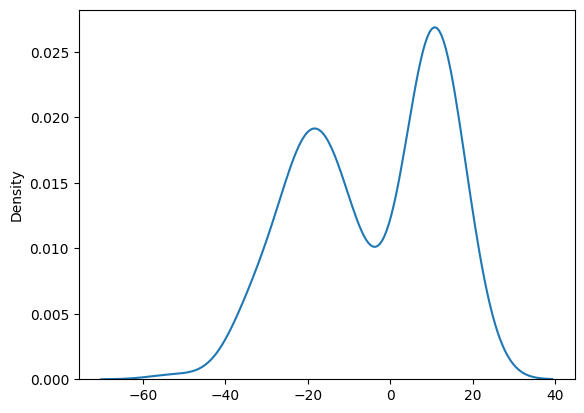

In [3]:
#  sampling  many dpoins for approximating the true distribution
# this is a multimodal density
sns.kdeplot(np.concatenate([np.random.normal(-20, 10, 100), np.random.normal(10, 5, 100)]))
plt.show()

## 1.2 Complete the code and draw the pictures
Completing KNN estimator wtih a kernel funtion. 
The kernel funtion is a Gaussian kernel, defined by $$K(u)=\frac{1}{\sqrt{2\pi}}exp(-\frac{u^2}{\tau}),$$
where $\tau$ is the length-scale. 

**Task:** You should complete the code for the KNN estimator with a Gaussian kernel function and plot the estimated density with three sets of parameters, as shown below
- k=3,$\tau=2$
- k=3,$\tau=0.2$
- k=5,$\tau=2$

**Hint:** We have already generated a set of test points and saved them in the variable x_test. Your task is to plot the estimated density function $\hat{p}(x)$ based on these points. The code framework has been provided, and you can either write it from scratch or fill in the missing parts in the framework.

In [15]:
##########################
#Define your KNN estimator 
#########################
class KNNKernelEstimator:
    def __init__(self, k, tau):
        self.k = k
        self.tau = tau

    def gaussian_kernel(self, u):
        return 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * (u ** 2) / self.tau)

    def fit(self, x_train):
        self.x_train = x_train

    def predict(self, x_test):
        density_estimates = []
        for x in x_test:
            distances = np.abs(x - self.x_train)
            sorted_indices = np.argsort(distances, axis=0)
            k_nearest_indices = sorted_indices[:self.k]
            k_nearest_distances = distances[k_nearest_indices]
            weights = self.gaussian_kernel(k_nearest_distances)
            density_estimate = np.sum(weights) / (self.k * self.tau)
            density_estimates.append(density_estimate)
        return np.array(density_estimates)

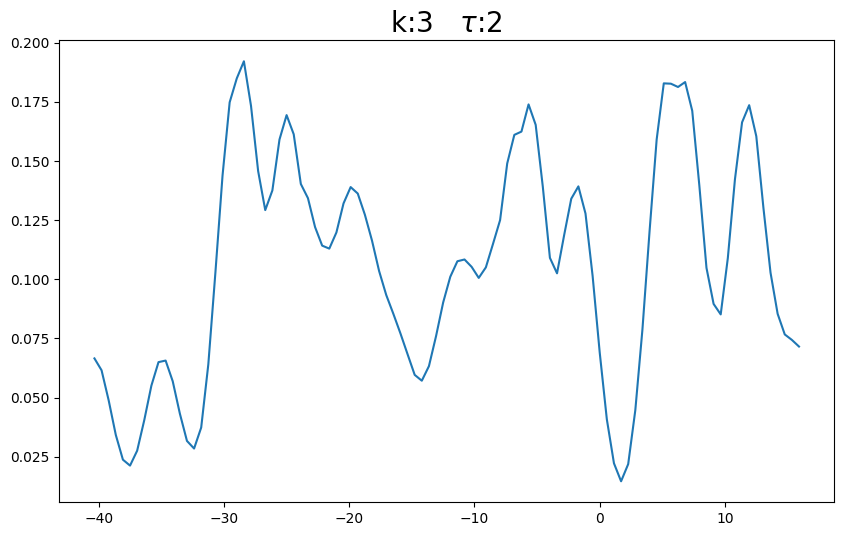

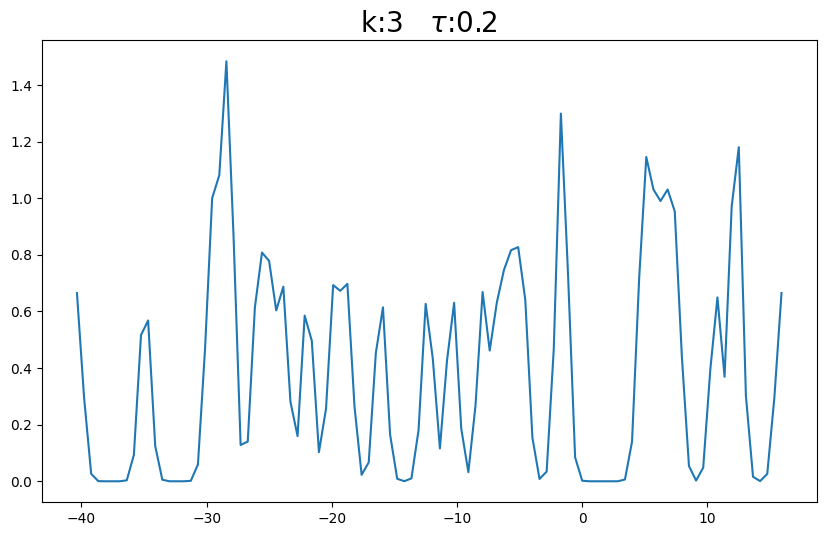

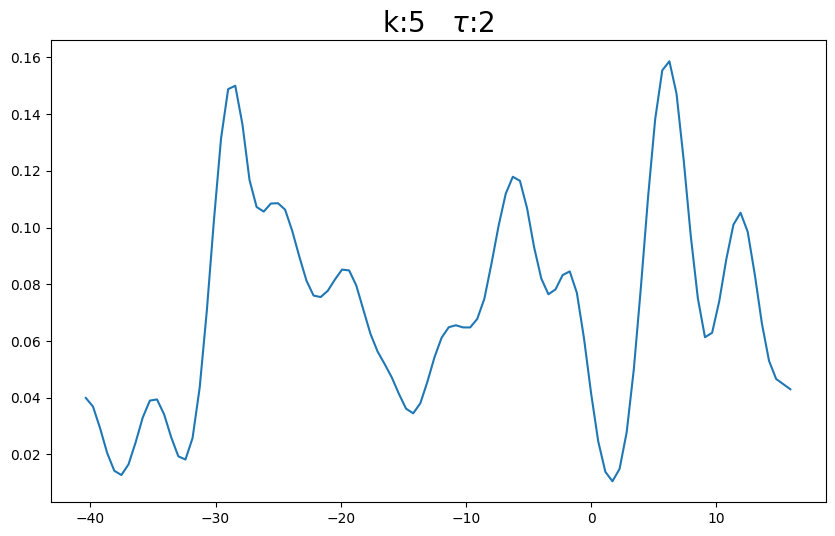

In [16]:
k=3
tau=2
##################
#Fill in the blanks by your code or using following template
kke = KNNKernelEstimator(k,tau)
kke.fit(x_trian)
predict_x = kke.predict(x_test)
###################

plt.figure(figsize=(10,6))
plt.plot(x_test,predict_x)
plt.title("k:"+str(k)+r"   $\tau$:"+str(tau),fontsize=20)
plt.show()

k=3
tau=0.2
##################
#Fill in the blanks by your code
kke = KNNKernelEstimator(k,tau)
kke.fit(x_trian)
predict_x = kke.predict(x_test)
###################
plt.figure(figsize=(10,6))
plt.plot(x_test,predict_x)
plt.title("k:"+str(k)+r"   $\tau$:"+str(tau),fontsize=20)
plt.show()

k=5
tau=2
##################
#Fill in the blanks by your code
kke = KNNKernelEstimator(k,tau)
kke.fit(x_trian)
predict_x = kke.predict(x_test)
###################
plt.figure(figsize=(10,6))
plt.plot(x_test,predict_x)
plt.title("k:"+str(k)+r"   $\tau$:"+str(tau),fontsize=20)
plt.show()

# 2.Deep Learning for classification (30 pts)

For this task, you are required to design and train a deep neural network to perform a classification task on a provided dataset. The dataset can be found at the following link: http://pan.shanghaitech.edu.cn/cloudservice/outerLink/decode?c3Vnb24xNjgyNzcwODk4OTU5c3Vnb24=

The dataset consists of a training set and test set. The training set should be used to train your model, and the test set should be used to evaluate the performance of your model.

**Your goal is to achieve at least 70% accuracy on the test set using your trained model. One point is deducted for every point the accuracy decreases**， such as 66.2% will lose 4 points.

If your computer does not have the necessary resources to train a deep neural network, you may use the computing resources of a school computing cluster, Kaggle, or Google Colab.

Hint:The use of pre-training models is prohibited (direct zero points) and custom neural networks are encouraged.



In [61]:
import os
import numpy as np
# !pip install opencv-python  # the command for installing opencv,i.e, cv2
import cv2
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import pandas as pd
from torch.utils.data import DataLoader, Dataset
import time
import warnings
import  torch.nn.functional as F

warnings.filterwarnings("ignore")
torch.manual_seed(3407)


In [62]:
# load the data set
def readfile(path, label):
    image_dir = sorted(os.listdir(path))
    x = np.zeros((len(image_dir), 128, 128, 3), dtype=np.uint8)
    y = np.zeros((len(image_dir)), dtype=np.uint8)
    for i, file in enumerate(image_dir):
        img = cv2.imread(os.path.join(path, file))
        x[i, :, :] = cv2.resize(img,(128, 128))
        if label:
            y[i] = int(file.split("_")[0])
    if label:
        return x, y
    else:
        return x

In [63]:
workspace_dir = './food-11'
print("Reading data")
train_x, train_y = readfile(os.path.join(workspace_dir, "training"), True)
print("Size of training data = {}".format(len(train_x)))
test_x, test_y = readfile(os.path.join(workspace_dir, "testing"), True)
print("Size of test data = {}".format(len(test_x)))

Reading data
Size of training data = 9866
Size of test data = 3430


In [64]:

train_transform = transforms.Compose([
    ######################
    #Fill in the blanks by your code
    #########################
    transforms.ToPILImage(),
    transforms.RandomResizedCrop(128),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])
test_transform = transforms.Compose([
    ######################
    #Fill in the blanks by your code
    #########################
    transforms.ToPILImage(),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
class ImgDataset(Dataset):
    def __init__(self, x, y=None, transform=None):
        self.x = x
        # label is required to be a LongTensor
        self.y = y
        if y is not None:
            self.y = torch.LongTensor(y)
        self.transform = transform
    def __len__(self):
        return len(self.x)
    def __getitem__(self, index):
        X = self.x[index]
        if self.transform is not None:
            X = self.transform(X)
        if self.y is not None:
            Y = self.y[index]
            return X, Y
        else:
            return X

In [65]:
batch_size = 128
train_set = ImgDataset(train_x, train_y, train_transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

test_set = ImgDataset(test_x, test_y, test_transform)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# 2.2 Construct deep learning model

In [66]:
################################
#Define your nerual network
##################################
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        ######################
        #   Use the pytorch API to build the neural network
        #########################
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 16 * 16, 512)  # Adjusted input size
        self.fc2 = nn.Linear(512, 11)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## 2.3 trianing your model
There are some tips which I hope can help you complete the task:
- If the loss function goes down too slowly, you can make the step size larger. This trick is better combined with an adaptive learning rate regulator
- If the model is overfitting, you can add a dropout layer in your model. 
-  [Data augmentation](https://pytorch.org/vision/stable/transforms.html) is also a good way to increase model generalization. We recommend that you do this.


In [67]:
model = Classifier().cuda()
loss = nn.CrossEntropyLoss() # use cross entropy loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # use adam optimizer
num_epoch = 100

for epoch in range(num_epoch):
    epoch_start_time = time.time()
    train_acc = 0.0
    train_loss = 0.0

    model.train()
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()
        outputs = model(inputs)
        batch_loss = loss(outputs, labels)
        batch_loss.backward()
        optimizer.step()

        train_acc += torch.sum(torch.argmax(outputs.cpu().data, dim=1) == labels.cpu()).item()
        train_loss += batch_loss.item()

        #將結果 print 出來
    print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.6f Loss: %3.6f' % \
      (epoch + 1, num_epoch, time.time()-epoch_start_time, \
      train_acc/train_set.__len__(), train_loss/train_set.__len__()))

[001/100] 8.29 sec(s) Train Acc: 0.188121 Loss: 0.017816
[002/100] 8.19 sec(s) Train Acc: 0.264646 Loss: 0.016171
[003/100] 8.40 sec(s) Train Acc: 0.310764 Loss: 0.015399
[004/100] 8.92 sec(s) Train Acc: 0.329617 Loss: 0.015013
[005/100] 8.70 sec(s) Train Acc: 0.343807 Loss: 0.014715
[006/100] 8.38 sec(s) Train Acc: 0.358504 Loss: 0.014545
[007/100] 8.28 sec(s) Train Acc: 0.368640 Loss: 0.014342
[008/100] 8.07 sec(s) Train Acc: 0.374620 Loss: 0.014209
[009/100] 8.23 sec(s) Train Acc: 0.394385 Loss: 0.013791
[010/100] 8.57 sec(s) Train Acc: 0.401378 Loss: 0.013669
[011/100] 8.47 sec(s) Train Acc: 0.418407 Loss: 0.013383
[012/100] 8.31 sec(s) Train Acc: 0.435536 Loss: 0.013001
[013/100] 8.05 sec(s) Train Acc: 0.439286 Loss: 0.012961
[014/100] 8.04 sec(s) Train Acc: 0.448409 Loss: 0.012606
[015/100] 8.09 sec(s) Train Acc: 0.463815 Loss: 0.012266
[016/100] 8.08 sec(s) Train Acc: 0.465944 Loss: 0.012257
[017/100] 8.19 sec(s) Train Acc: 0.482668 Loss: 0.011881
[018/100] 8.35 sec(s) Train Acc

KeyboardInterrupt: 

# Test your model
use your trained model to test the test set and print the accuracy.

In [68]:

model.eval()
test_acc = 0
with torch.no_grad():
    for i, data in enumerate(test_loader):
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        test_pred = model(inputs)
        test_acc +=np.sum(np.argmax(test_pred.cpu().data.numpy(), axis=1) == data[1].numpy())

test_acc = test_acc/test_set.__len__()
print("Test Acc: "+str(test_acc))

Test Acc: 0.5903790087463557
